<a href="https://colab.research.google.com/github/Ishitamalik/module-2/blob/main/Module_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

For this hotel booking analysis, the goal was to explore the customer data of a hotel and identify any potential trends or correlations. The purpose of this exploratory data analysis (EDA) was to explore the hotel booking data set and identify potential relationships between key variables.
The data set included customer booking information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the dataset, we built a variety of charts, including a count plot, bar plot, kdeplot, heatmap, pairplot, violin plot, and boxplot.
The data set was composed of over 119390 hotel bookings, each containing several variables such as 'hotel', 'is_canceled', 'lead_time', For this hotel booking analysis, the goal was to explore the customer data of a hotel and identify any potential trends or correlations. The purpose of this exploratory data analysis (EDA) was to explore the hotel booking data set and identify potential relationships between key variables.
The data set included customer booking information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', and 'reservation_status_date'.
Dataset variables are in int64, float64, and object datatypes. There are 32 variables: 12 variables are objects, 16 are int64, and 4 are float64. 31994 duplicate values were removed. The variables country had 452, children had 4, agent had 12193, and company had 82137 null values. We replaced the null value with the mode of each variable (country, children, agent) for these variables, but the variable "company" had more than 50% null value, so we removed it. Further, we removed outliers from lead_time and adr. The final dataset had 87396 observations.
We also changed the data types of variables children, agent, and reservation_status_date to int64, int64, and datetime64, respectively. We performed some feature engineering for more convenience and created new variables: total_stays, total_people, total_childrens, reserved_room_assigned, guest_category, and lead_time_category. Now total_people and total_childrens are in the floated 64 datatype, so we converted them to int64. Now We were removed from the observation because having total_people at 0 made no sense.

# **Problem Statement**


Our problem statement is that we have to book a hotel/resort so then we need to check which one is best, depends on some of the aspect like what is the seasonality and what are the top performing months? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? and what are the top countries in terms of booking and revenue? what the most frequent guest type? This hotel booking dataset can help you explore those questions!

#### **Define Your Business Objective?**

Explore and analyze the data to discover results and statistics

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn.widgets import color_palette
import plotly
import plotly.express as px


### Dataset Loading

In [ ]:
#import database from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
#file location is set
file_location = '/content/drive/MyDrive/Hotel Bookings.csv'

In [ ]:
#use pd.read_csv to read the data
Hotels_data=pd.read_csv(file_location)

In [ ]:
print(Hotels_data)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [ ]:
Hotels_data.head()
#it will shows the data of first five rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Hotels_data.tail()
#it will shows the data of last five rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
Hotels_data.info()
#it will gives the information of all the columns,values,etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
Hotels_data.shape
#it will gives the no. of rows and columns

(119390, 32)

First copy the data so that original data will remains unchange.

In [ ]:
df_Hotels=Hotels_data.copy()

In [ ]:
# Dataset Describe
df_Hotels.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df_Hotels.to_csv('/content/drive/My Drive/Hotel_bookings.csv', index=False)

## 3. ***Data Wrangling***

### Check is there any null value or missing values

In [ ]:
df_Hotels.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
#df_Hotels.isnull().sum()
# df_Hotels.isnull().sum().sort_values(ascending=True)
df_Hotels.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

###In this dataset we get 112593 null value in 'company' column so we have replaced the null values with 0

In [ ]:
#replace the null values 0.0 float
df_Hotels['company'] = df_Hotels['company'].fillna(0.0)
df_Hotels['company'].head(23)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18    110.0
19      0.0
20      0.0
21      0.0
22      0.0
Name: company, dtype: float64

###In the 'agent' column we have also get 16340 so we have replaced it with 0

In [ ]:
#here also the value got replaced with 0.0
df_Hotels['agent'] = df_Hotels['agent'].fillna(0.0)


###In country we can not set the country values as 0 becuase it contains country codes representing different countries. So instead of replacing it with zero we have replaced it with the mode value in country column. Mode is nothing but just the most repeating value .

In [ ]:
Hotels_data.country.mode().to_string()

'0    PRT'

###we use "inplace =True" to make permanent change

In [ ]:
df_Hotels['country'].fillna(Hotels_data.country.mode().to_string(), inplace=True)


###Children Column has the count of children then we replaced missing values with mean values

In [ ]:
df_Hotels['children'].fillna(round(Hotels_data.children.mean()), inplace=True)

###In the data set some rows have zero guests including adults,children and babies

In [ ]:
df_Hotels[(df_Hotels.adults+df_Hotels.babies+df_Hotels.children)==0].shape #here we get 180,32

(180, 32)

###Several rows in the dataset contains values that does not make any sense like having no adults, children and babies so we directly deleted it by using drop

In [ ]:
df_Hotels = df_Hotels.drop(df_Hotels[(df_Hotels.adults+df_Hotels.babies+df_Hotels.children)==0].index)

### Check the types of datatypes and converting it into int64

In [ ]:
df_Hotels.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor']

'white'

###1. Hotel type ratio

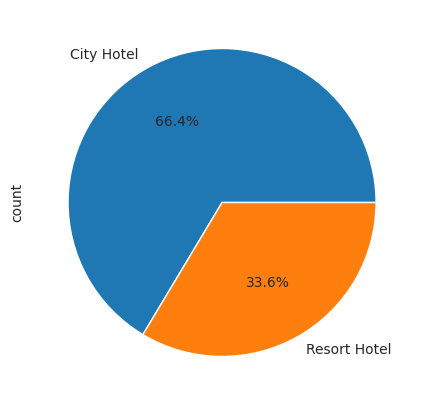

In [ ]:
sns.set_style("whitegrid")
hotels_type = df_Hotels['hotel'].value_counts()
hotels_type
plot = hotels_type.plot.pie(x = 'City Hotel', y='Resort Hotel', autopct='%1.1f%%', figsize=(5, 5))


#####  Why did you pick the specific chart?

The database divided into two types of hotels "city" hotels and "Resort" hotels. The following pie chart visually represents the relative share in percentages of each type of hotelAnswer Here.

#####  What is/are the insight(s) found from the chart?



The pie chart reveals that 66% of the hotels in the dataset are city hotels and the other 34% are resort hotels.

###2. Which month has maximum arrival in the year ?

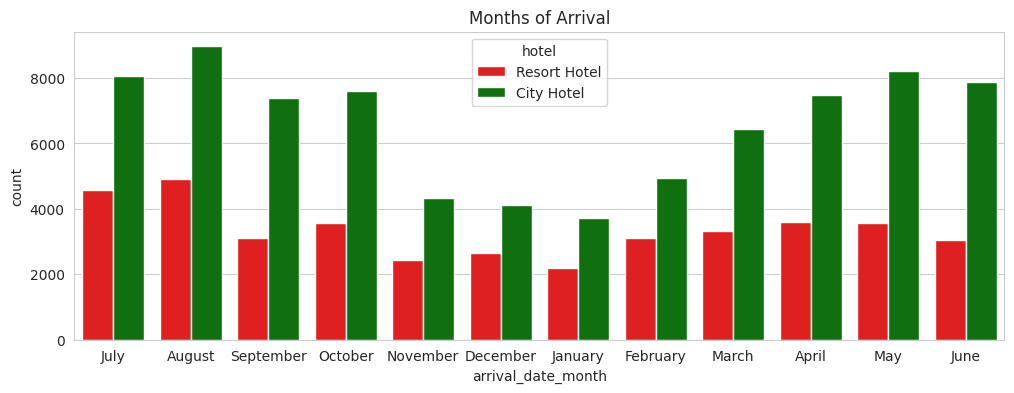

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df_Hotels ,palette= ['r','g'])
plt.title('Months of Arrival')
plt.show()


#####  What is/are the insight(s) found from the chart?

From the above graph it is observed that Generally, the months of November to March are off-peak periods for hoteliers. Between June and the end of August, attendance is at its peak, it is the high season. Seasonal downturns are experienced by everyone involved in the journey.

### 3. Yearwise booking ?

Text(0.5, 1.0, 'yearly bookings')

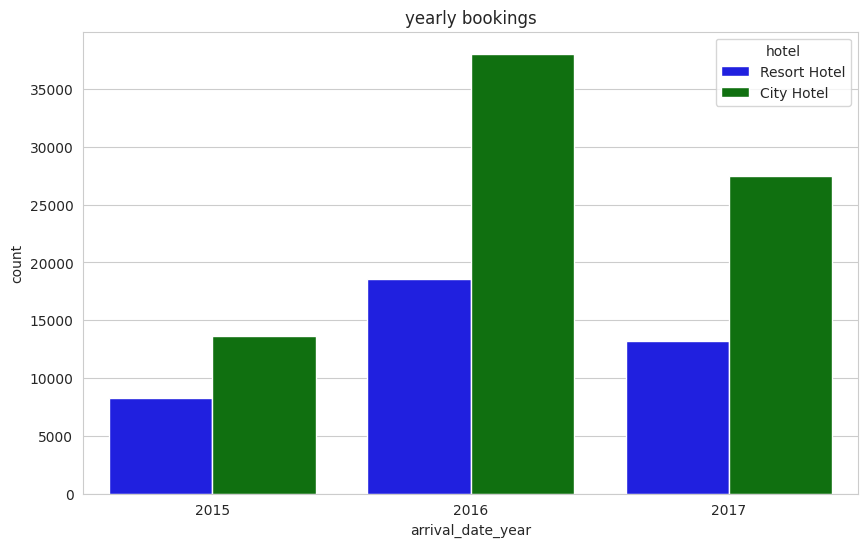

In [ ]:
# Visualizing Hotel wise yearly bookings
sns.countplot (x= 'arrival_date_year', data= df_Hotels, hue= 'hotel',palette= ['b','g']).set_title ('yearly bookings')

##### What is/are the insight(s) found from the chart?

It is observed that the Bookings across years is higher for city hotel than resort hotel.

### 4. From which country the most guests came?

<Axes: >

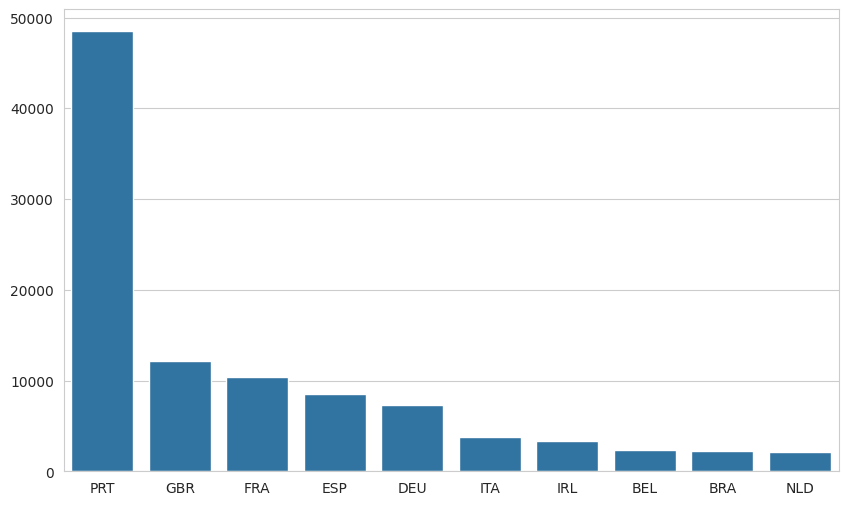

In [ ]:
#the most guests are coming.
sns.barplot (y= list(df_Hotels.country.value_counts().head (10)), x= list(df_Hotels.country.value_counts().head(10).index))


#####  What is/are the insight(s) found from the chart?

From above it is observed that the most guests are came from PRT which the code of Portugal followed by GBR which is nothing but United Kingdom

###5. Most Number of Guest ?

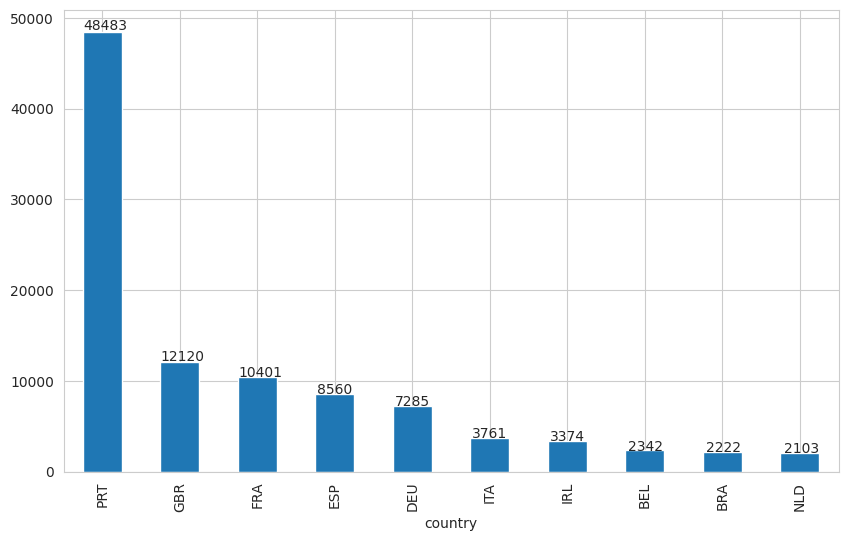

In [ ]:
#number of guest
number_of_guest= df_Hotels.country.value_counts().head(10).plot (kind= 'bar');
for p in number_of_guest.patches:
    number_of_guest.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#####  What is/are the insight(s) found from the chart?

The most number of guest are from Portugal which we have observed from previous graph now from current graph it is observed that the guests are 48483

### 6. How many booking cancelled?

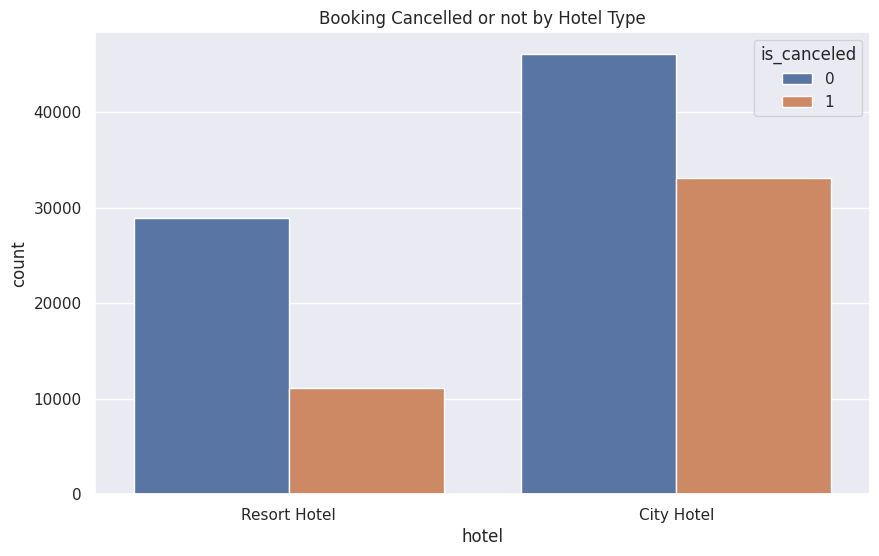

In [ ]:
# Avg of booking cancellations vis a vis bookings.
sns.set(style = "darkgrid")
plt.title("Booking Cancelled or not by Hotel Type")
ax = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df_Hotels)

#####  What is/are the insight(s) found from the chart?

In this plot blue shaded area represents booking not cancelled and orange shaded area represents cancelled and it is observed that more than 30000 booking were cancelled in city hotel followed by more than 10000 in resort hotel

### 7. Monthly cancellations

<Axes: xlabel='customer_type', ylabel='mean'>

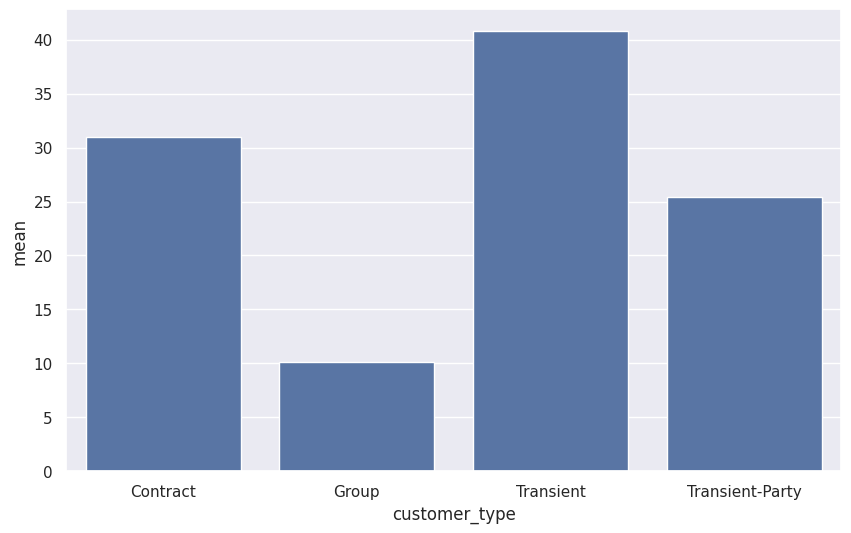

In [ ]:
# Plotting monthly cancellations and customer type
a = df_Hotels.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)


#####  What is/are the insight(s) found from the chart?

1.Contract- when the booking has an allotment or other type of contract associated to it

2.Group- when the booking is associated to a group

3.Transient- when the booking is not part of a group or contract, and is not associated to other transient booking

4.Transient-party- when the booking is transient, but is associated to at least other transient booking

Here it is observed that most of the transient customers had cancelled the booking.

### 8. Market segment wise booking


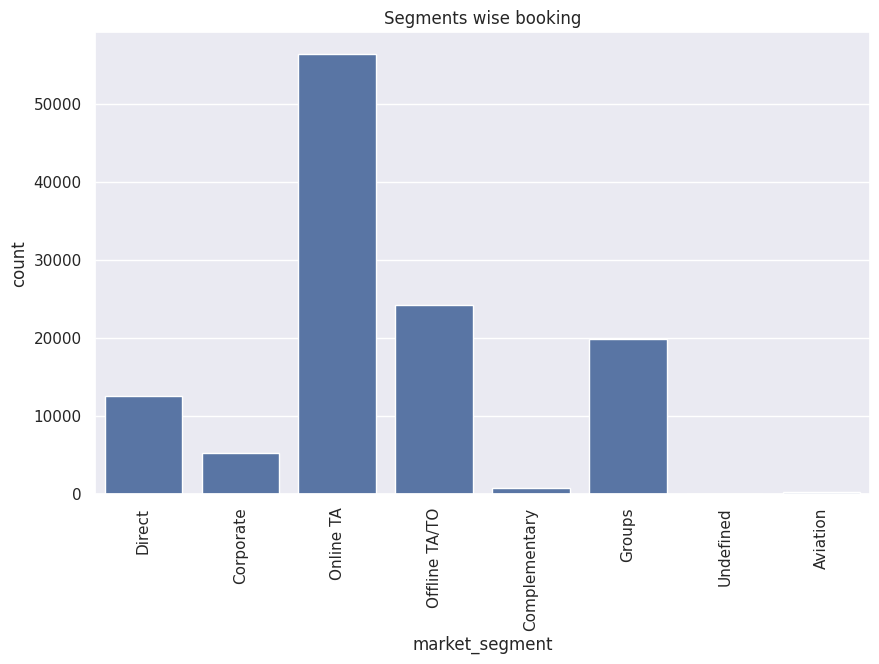

In [ ]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df_Hotels)
plt.xticks(rotation = 90)
plt.show()


#####  What is/are the insight(s) found from the chart?

Most of the market_segment used Online TA and Offline TA/TO channels which is travel agency and tour operator.Followed by Groups and direct channel.

### 9. What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

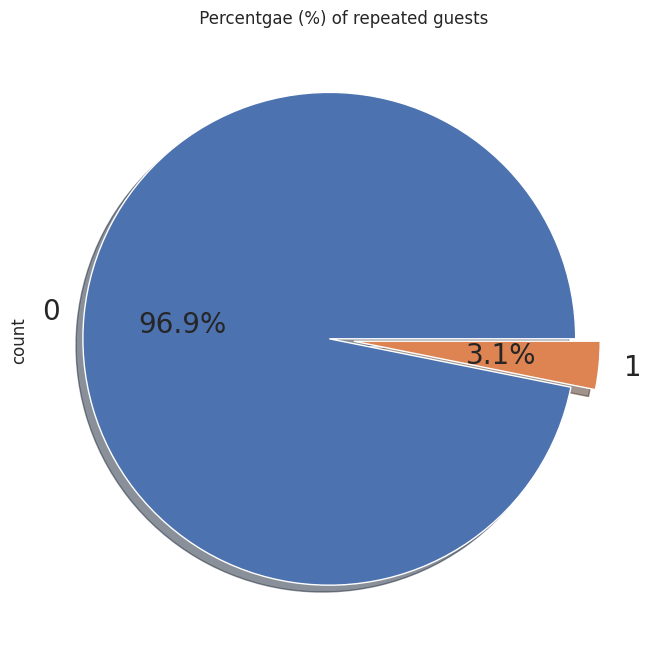

In [ ]:
df_Hotels['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")



#####  What is/are the insight(s) found from the chart?

Repeated guests are very few which is only 3.1 %. In order to retained the guests , hotels/resort management should take feedback from the guests in order to imporve their services.

### 10. Which type of food is mostly preferred by the guests?

Text(0.5, 1.0, 'Preferred Meal Type')

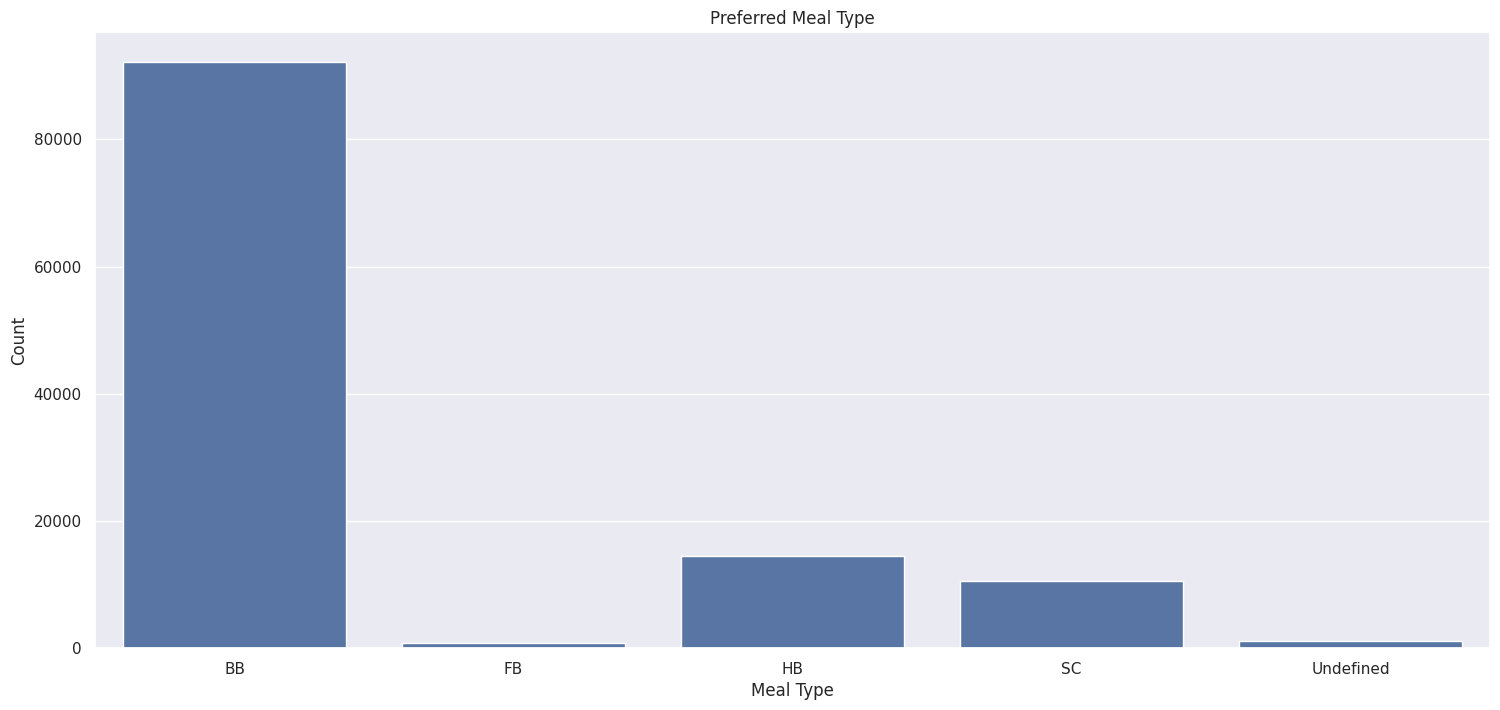

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=df_Hotels['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")


Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

#####  What is/are the insight(s) found from the chart?


*   So the most preferred meal type by the guests is BB( Bed and Breakfast)
*   HB- (Half Board) and SC- (Self Catering) are followed then.



### 11.Which is the busiest month for hotel booking?

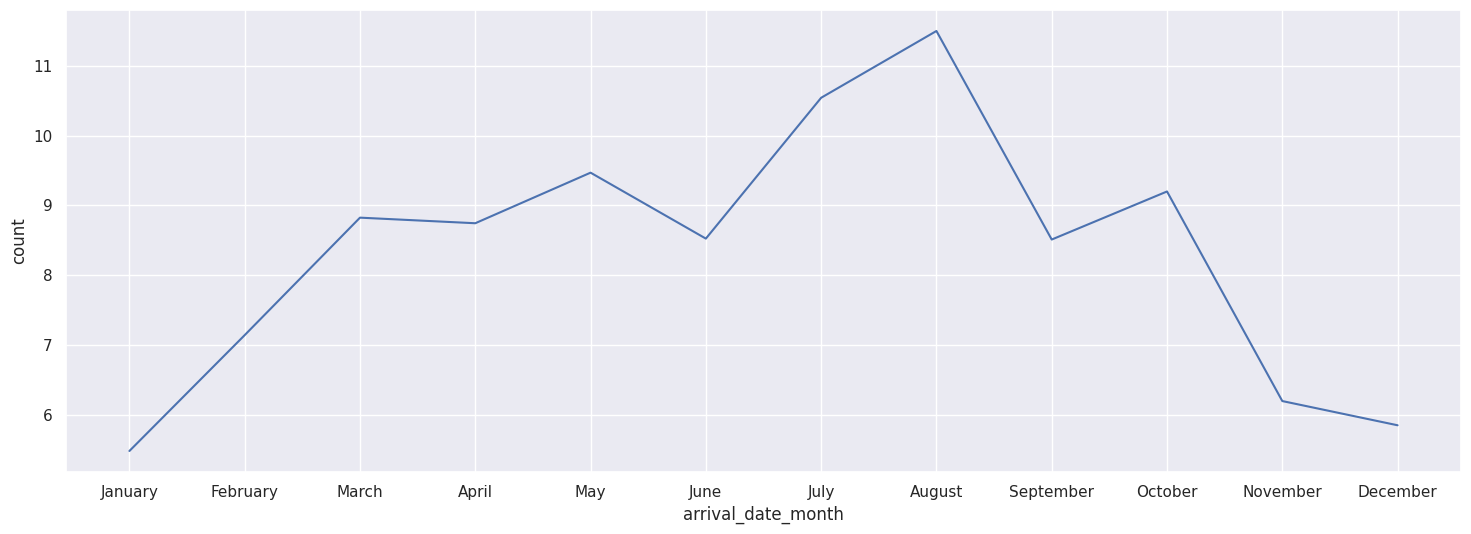

In [ ]:
df_not_canceled = df_Hotels[df_Hotels['is_canceled'] == 0]
plt.figure(figsize=(18,6))
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


sns.lineplot( y)
plt.show()

#####  What is/are the insight(s) found from the chart?

Above line plot gives a conclusion that most of the busiest months are July and August

### 12. Which is the busiest month for Resort and City Hotel?

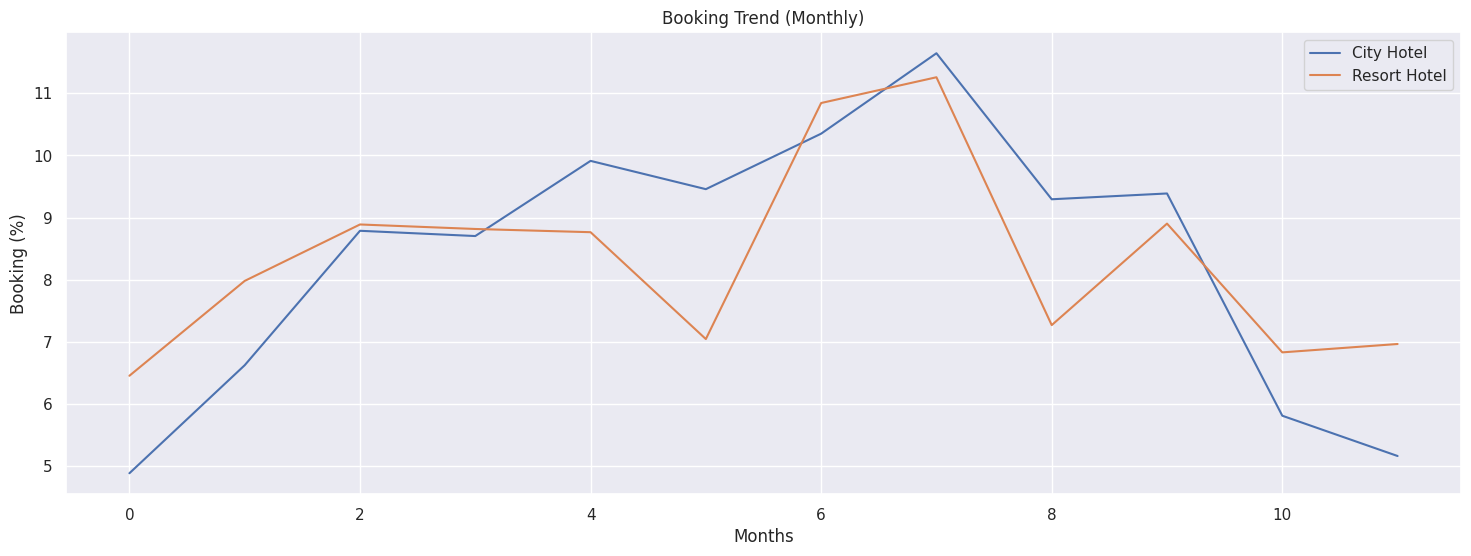

In [ ]:
# Select only City Hotel
sorted_months = df_not_canceled.loc[df_Hotels.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df_Hotels.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100
# Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot( y1.values, label='City Hotel', sort=False)
sns.lineplot( y2.values, label='Resort Hotel', sort=False)

plt.show()


#####  What is/are the insight(s) found from the chart?

It is observed that at the start of year means from january to march the booking percentage in city hotel hotel is less as compare to resort hotel and in the month of April both of resort and city hotel has not any gradual increase or decrease in booking ,next in the month of April to May the booking in city hotel increases rapidly but resort get decreases. Now from June to August there is sudden rise in booking of both hotels and then decrease in the month of september.

1.So from the above pattern it is observed that City hotel has maximum booking from the month April to September but after that there is fall down in booking.  
2.Now for the Resort hotel March-May,June-August and November-January is busiest month

### 13. Night stay

<ipython-input-46-f42171341f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']


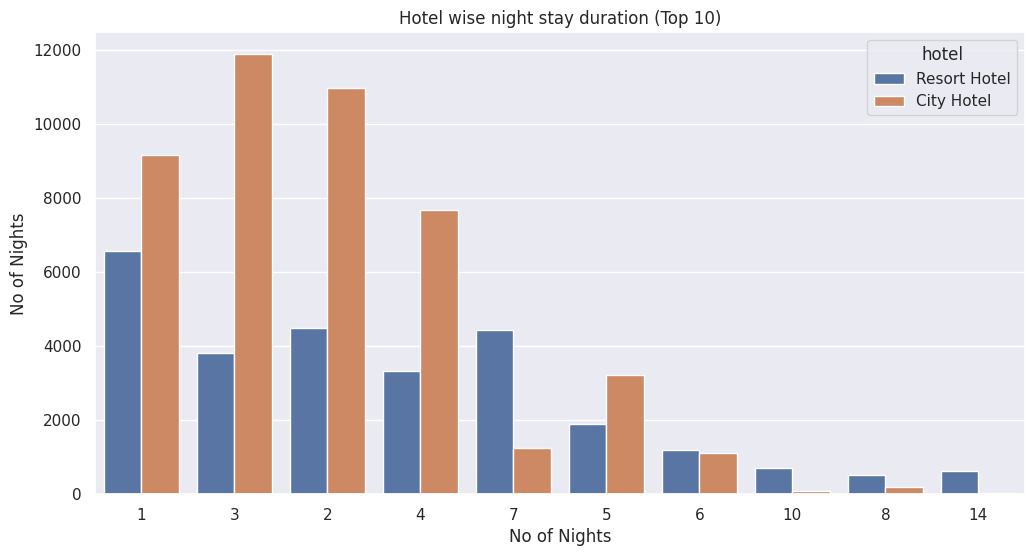

In [ ]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

### 14. Pair Plot

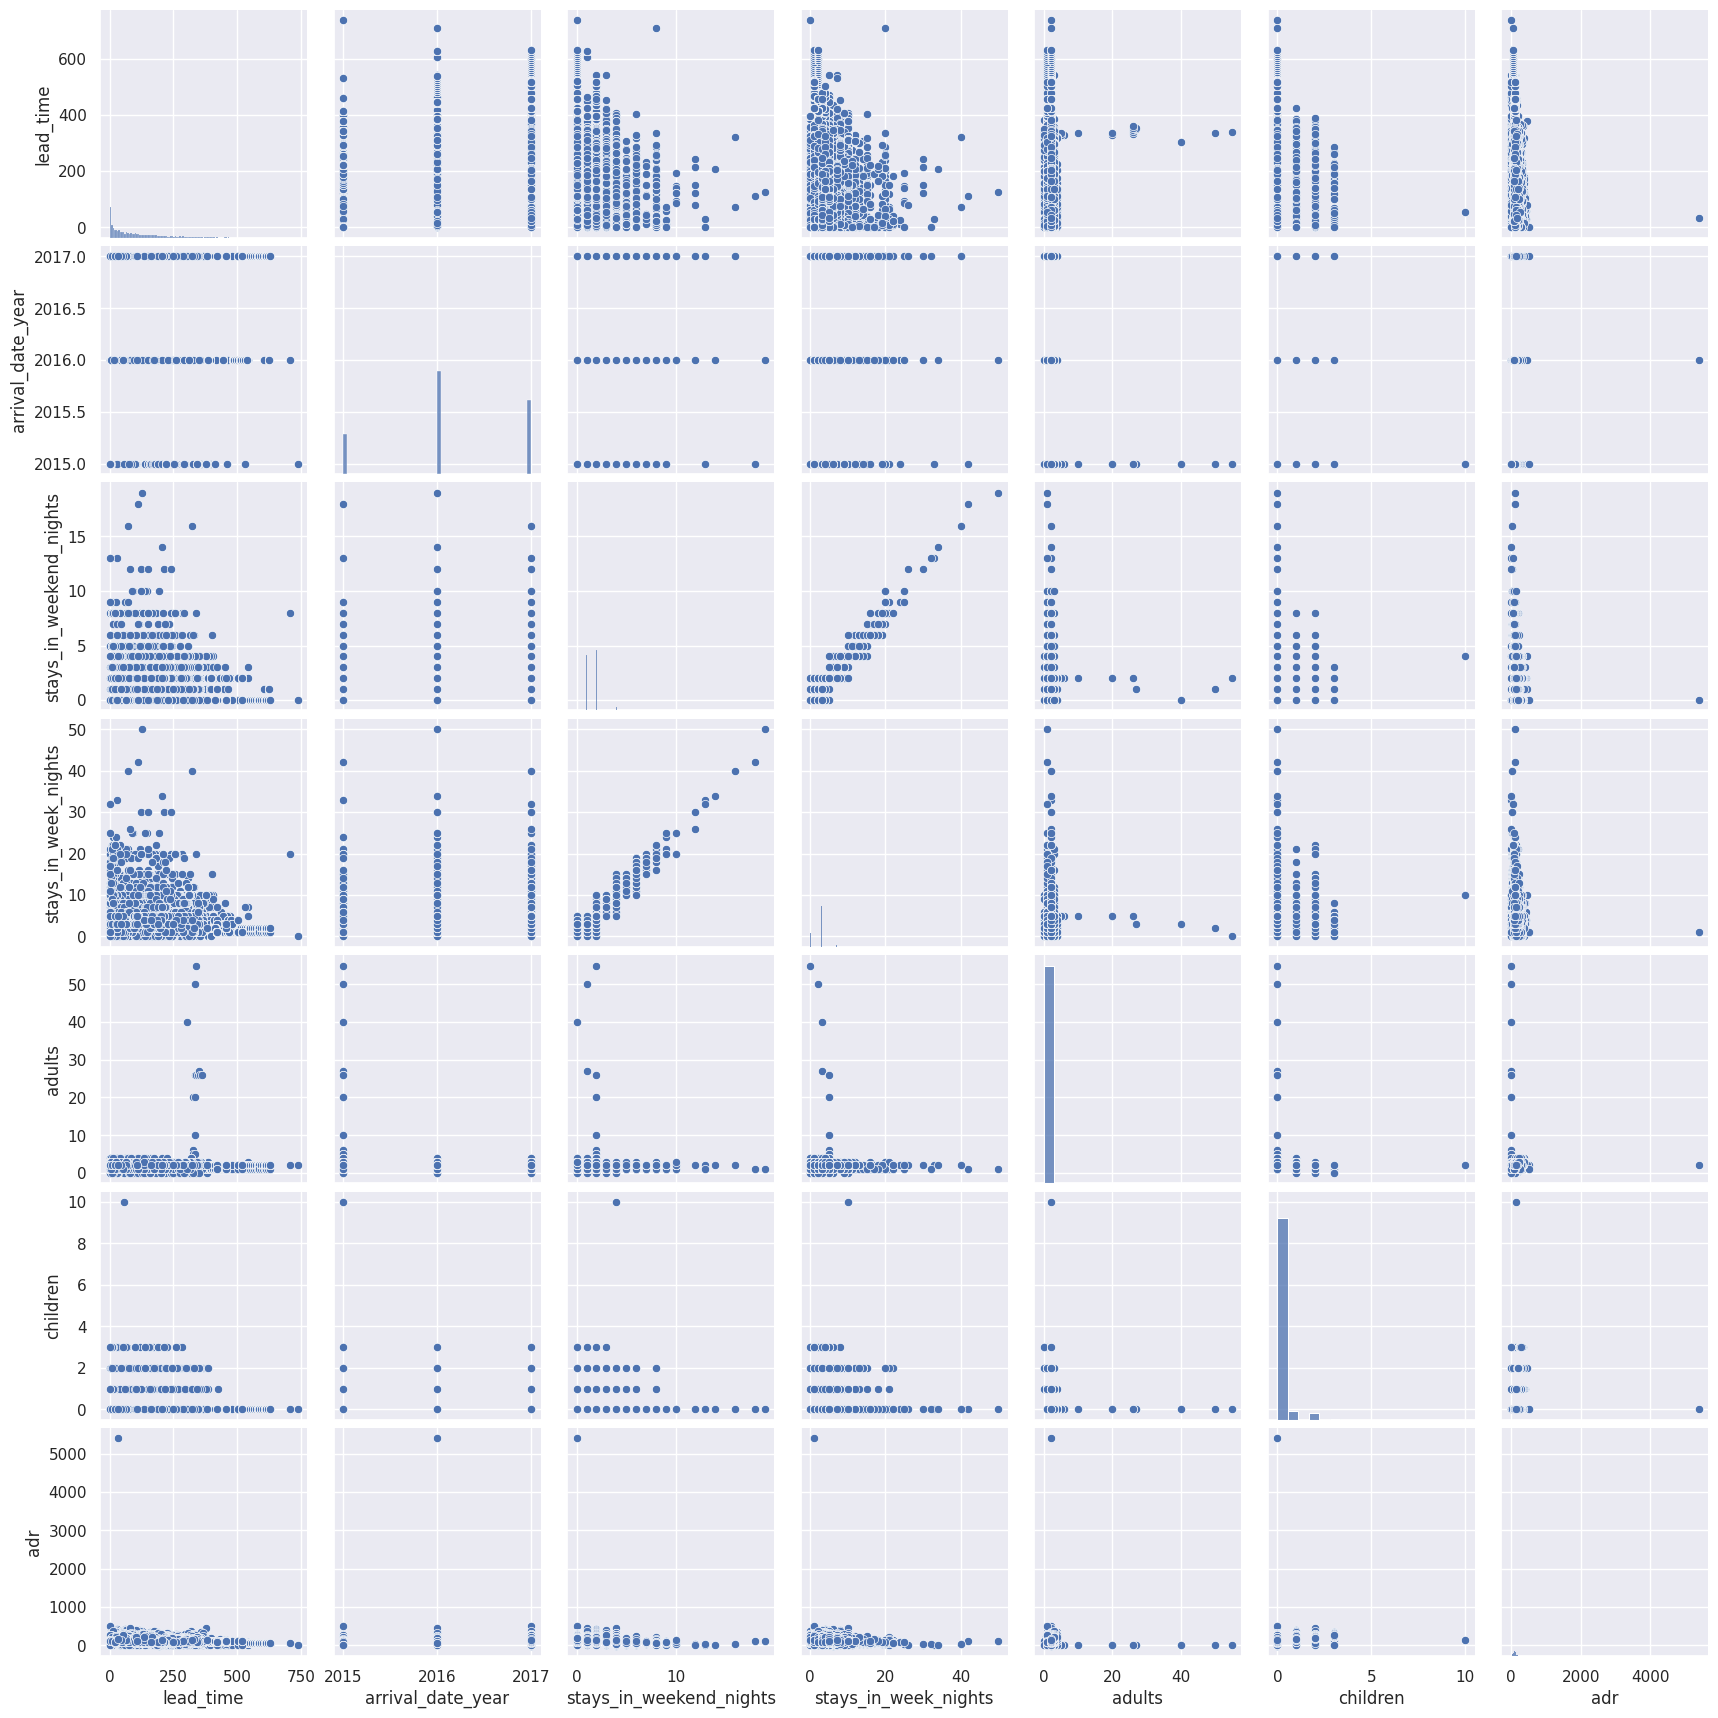

In [ ]:
# Select relevant columns for the pair plot
columns = ['lead_time', 'arrival_date_year', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'adr']
df_selected = df_Hotels[columns]

# Create the pair plot
sns.pairplot(df_selected)
plt.show()

We can conclude from the relationship between lead_time and is_canceled that a longer lead time does not result in cancellations.
We can conclude from the lead_time and arrival_date_year graphs that people were consistently interested in booking rooms in advance in 2015, 2016, and 2017.
According to the graph of arrival_date_year and days_in_waiting_list, 2016 had the longest waiting period for room bookings.
We can conclude from the graph of ADR and days_in_waiting_list that a short minimum waiting period for bookings results in a high ADR.
From the graph of "is_canceled" and "days_in_waiting_list," we conclude that waiting for bookings is not a reason for booking cancellation.

# **Conclusion**



1. The pie chart reveals that 66% of the hotels in the dataset are city hotels and the other 34% are resort hotels.

2. The months of November to March are off-peak periods for hoteliers. Between June and the end of August, attendance is at its peak, it is the high season.

3. The booking for city hotel is higher than resort yearwise.

4. Most of the guests came from european countries, with most of guests coming from Portugal.

5. The most number of guests are 48483 which is from Portugal.
6. More than 30000 booking were cancelled in city hotel followed by more than 10000 in resort hotel.

7. Most of the transient customers had cancelled the booking.
8.Most of the market_segment used Online TA and Offline TA/TO

9. Repeated guests are very few which is only 3.1 %. In order to retained the guests , hotels/resort management should take feedback from the guests in order to imporve their services.

10. Most preferred meal type by the guests is BB.

11. Most of the busiest months are July and August

12. City hotel has maximum booking from the month April to September but after that there is fall down in booking Now for the Resort hotel March-May,June-August and November-January is busiest month




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***